# Segmentation

- Image classification, Object detection 모델은 이미지에서 어떤 물체의 종류를 분류하거나 물체의 존재와 위치를 탐지한다.
- 하지만 Segmentation은 픽셀 수준에서 이미지의 각 부분이 어떤 의미를 갖는 영역인지 분리해 내는 방법이다.

### Semantic Segmentation & Instance Segmentation

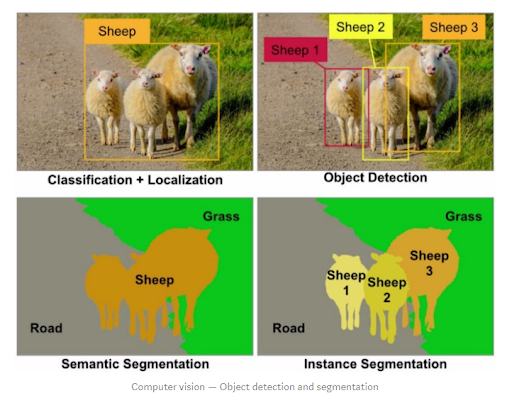

두 사진 모두 Segmentation의 결과를 보여주는 사진이라는 점에서 동일하다. 다른 점은 좌측(Semantic Segmentation)은 양, 길, 풀밭의 영역을 정확히 구분했지만 우측(Instance Segmentation)은 양의 개체들의 영역을 픽델 단위로 구분했다는 점이다.

### (1) Semantic Segmentation

##### U-Net

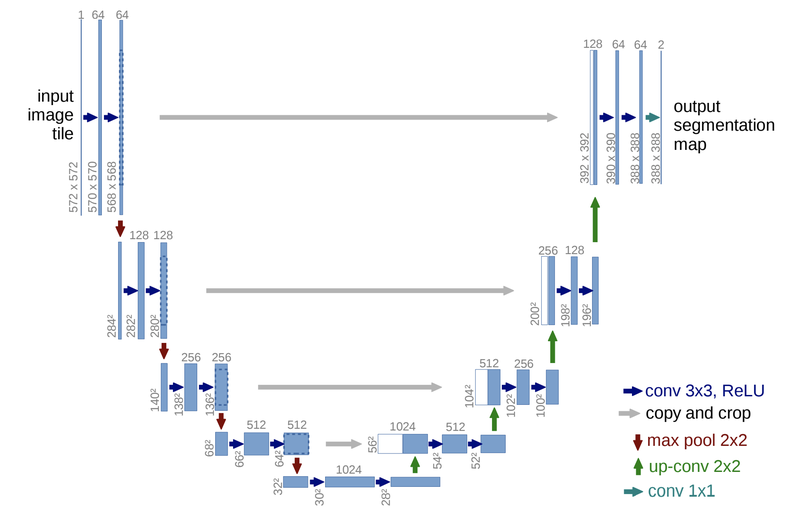

U-Net은 Semantic Segmentation의 대표적인 모델이다.   
input으로 572x572 이미지가 들어가서 388x388 이미지가 나오는데, 이전에 봤던 detection이나 classification 문제보다 확실히 큰 output이다. 그 이유는 segmentation을 위해서 이미지의 각 픽셀에 해당하는 영역의 클래스별 정보가 필요하기 때문이다.

### (2) Instance Segmentation

Instance Segmentation은 같은 클래스 내에서도 개체들을 분리하여 segmentation을 수행한다. Semantic Segmentation보다 더욱 어려운 과제처럼 느껴지는데 어떻게 접근해야 할까?   
아마 Object Detection 모델로 각 개체를 구분하고 이후에 각 개체 별로 Semantic Segmentation을 수행하는 방식으로 접근할 수 있을 것이다.   
이러한 방식 중 대표적인 것이 Mask R-CNN이다.

Mask R-CNN은 2-Stage Object Detection의 가장 대표적인 Faster-R-CNN을 계승한 것이다.   
Faster-R-CNN의 아이디어인 RoIPool 을 개선하여 Segmentation에 유리하게 한 RoIAlign, 그리고 클래스별 마스크 분리라는 두 가지 아이디어를 통해 Object Detection과 Semantic Segmentation을 사실상 하나의 Task로 엮어낸 것으로 평가받는 중요한 모델이다.

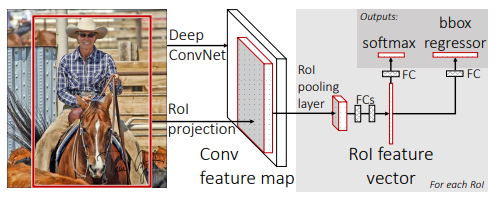

그 전에 R-CNN, Fast-R-CNN, Faster-R-CNN에 대해 간략히 이해를 해보도록 하자.

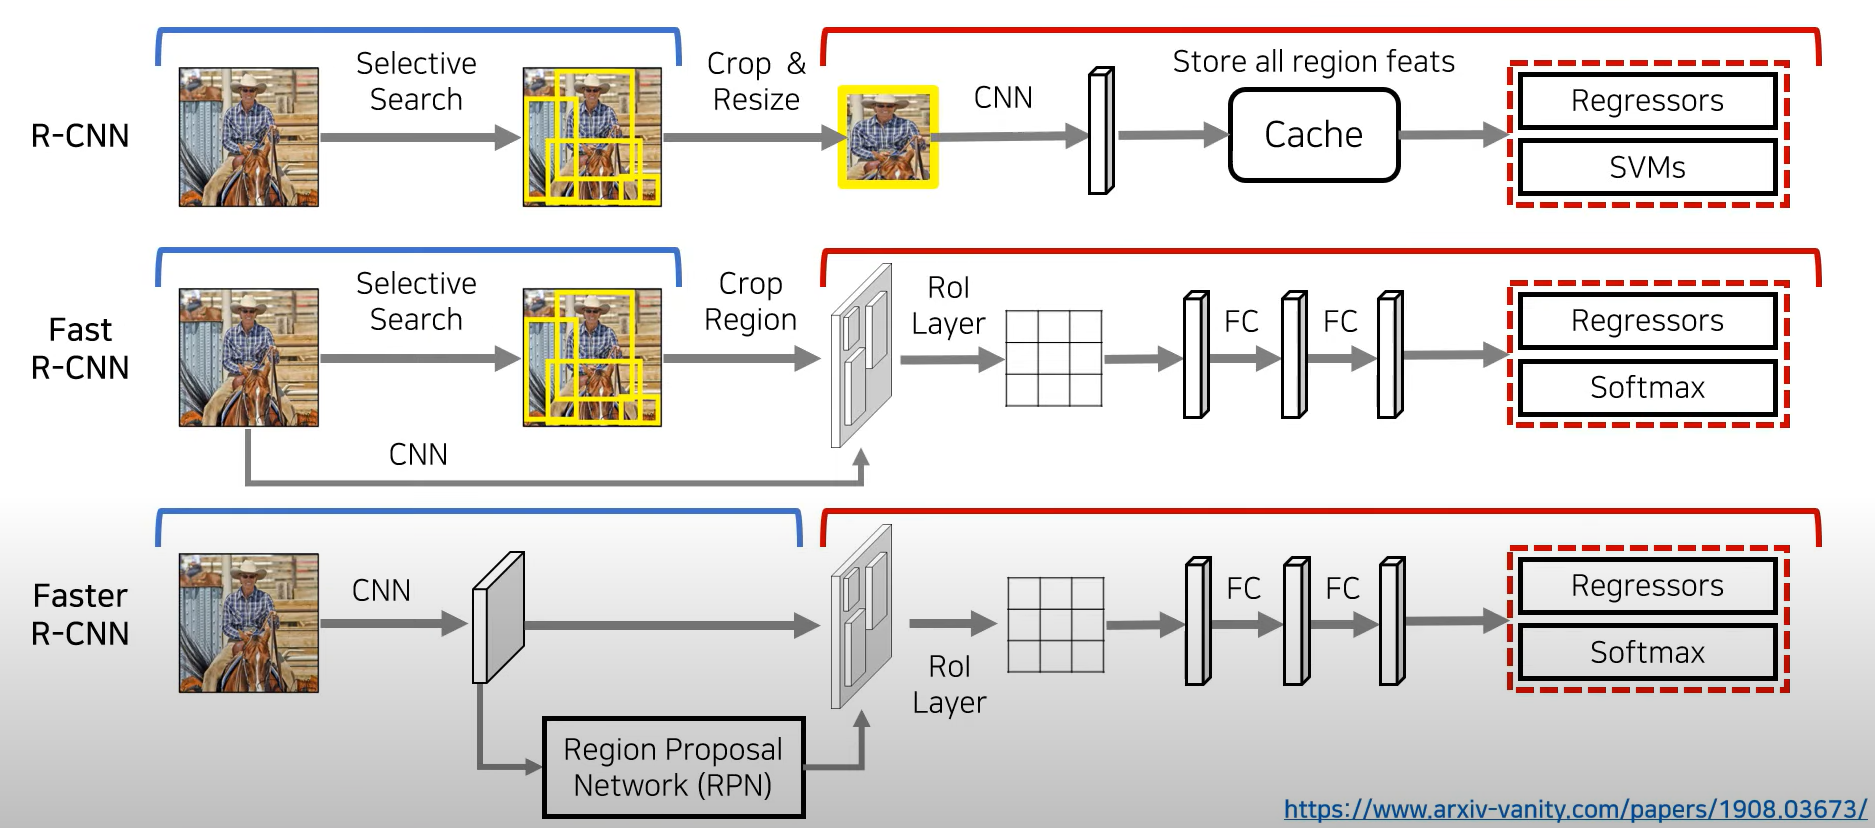

 - R-CNN은 물체가 존재할 법한 위치를 찾은 후 개별적으로 CNN 네트워크에 넣어서 feature vector를 추출한다. 후에 이 vector에 대해 SVM을 이용하여 classification을 진행하고 Regressor를 이용해서 정확한 물체의 위치를 bounding box를 조절해서 예측할 수 있도록 한다.   
    
    
 - Fast-R-CNN은 기본 R-CNN과 마찬가지로 selective search를 이용해 Region proposal을 찾는다. 다만 Fast-R-CNN은 CNN을 한 번만 거쳐서 feature map을 뽑는다. 또한 SVM이 아닌 Softmax를 이용하여 각 클래스에 대한 확률을 구한다.   
    
    
- R-CNN과 Fast-R-CNN은 CPU에서 Region Proposal을 진행한다. 하지만 연산속도에 문제가 있어서 Faster-R-CNN은 GPU에서 연산을 수행할 수 있는 Region Proposal Network( RPN)을 제안한다. 

##  주요 Segmentation 모델

### 1. FCN

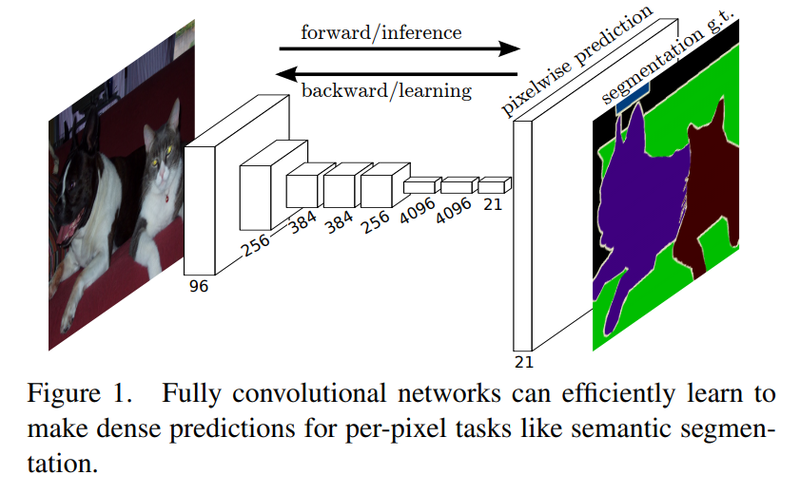

- 내가 정리한 FCN

https://velog.io/@jjun8177/Fully-Convolutional-Network

### 2. U-Net

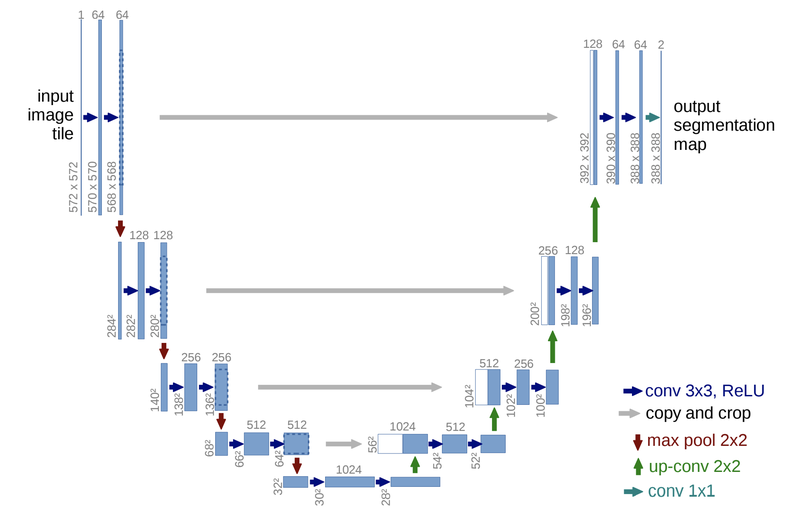

논문에서 네트워크 구조를 좌측의 Contracting path와 우측의 Expansive path 두 가지로 구분한다.   
우측의 Contracting path는 일반적으로 우리가 사용해왔던 Convolution network와 유사한 구조를 가진다. 각 블록은 두 개의 3x3 convolution과 ReLU를 가지고 그 뒤로 downsampling을 위해서 2x2의 커널을 2 stride로 max pool 하게 된다. Downsampling을 거친 후 다음 convolution의 채널 크기는 두 배씩 늘어나도록 설계되었다.   
Expansive path에서는 각 블록에 2x2 up-convolution이 붙어 채널이 절반씩 줄어들고 특성 맵의 크기는 늘어난다. Expansive path의 블록은 contracting block과 동일하게 3x3 convolution이 두 개씩 사용되었다.   
두 path에서 크기가 같은 블록의 출력과 입력은 skip connection처럼 연결해 주어 low-level의 feature를 활용할 수 있도록 하였다. 마지막에는 1x1 convolution으로 원하는 Semantic Segmentationi에서 맵을 얻을 수 있다.   
결과적으로 572x572 이미지가 들어가 388x388 크기에 두 가지의 클래스를 가진 Segmentation map이 나온다.   
모델의 입력값과 출력값의 크기가 다른 이유는 padding을 하지 않아서이다.

- Tile 기법

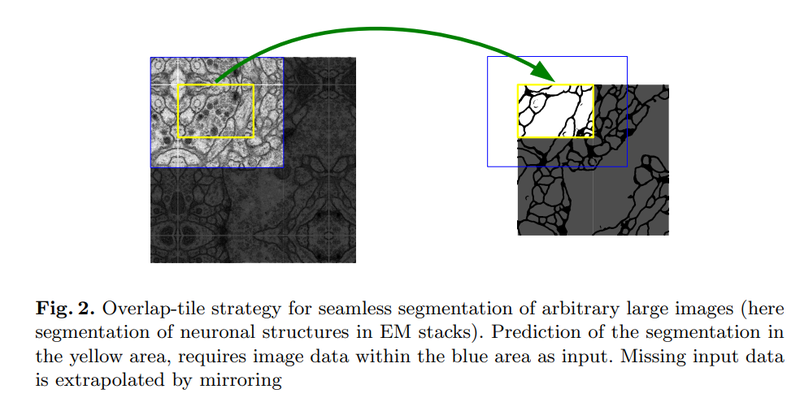

FCN은 입력 이미지의 크기를 조정하여 segmentation 맵을 얻어냈다. 반면 U-Net은 tile 방식을 사용해서 어느 정도 서로 겹치는 구간으로 타일을 나누어 네트워크를 추론, 큰 이미지에서도 높은 해상도의 segmentation 맵을 얻을 수 있도록 했다.

### 3. DeepLab

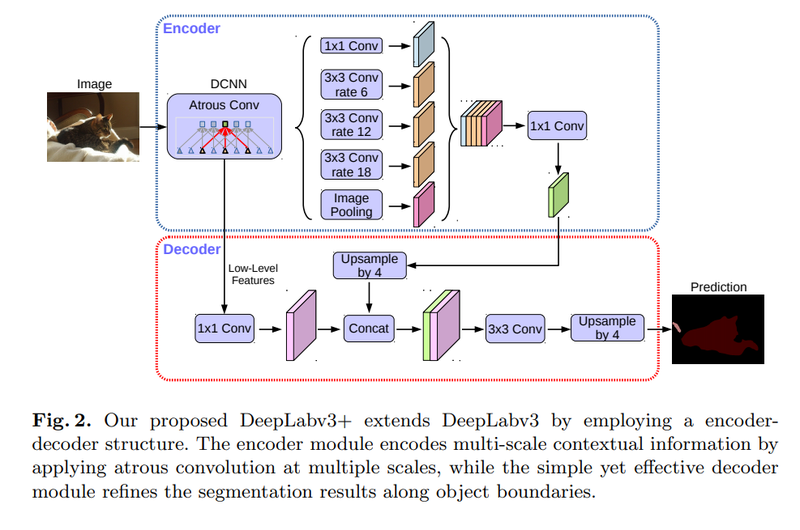

U-Net에서의 Contracting path와 Expansive path의 역할을 하는 것이 여기서는 위 그림의 인코더, 디코더이다.   
인코더는 이미지에서 필요한 정보를 특성으로 추출해 내는 모듈이고 디코더는 추출된 특성을 이용해 원하는 정보를 예측하는 모듈이다.   
U-Net은 3x3 convolution을 사용했지만 DeepLab V3+는 Atrous convolution을 사용한다. 그리고 이로 Atrous convolution을 여러 크기에 다양하게 적용한 것이 ASPP(Astrous Spatial Pyramid Pooling)이다.

##### Atrous convolution

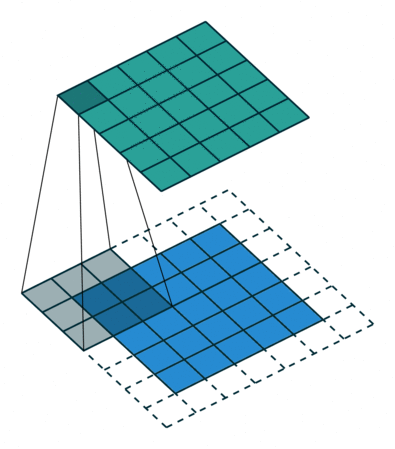

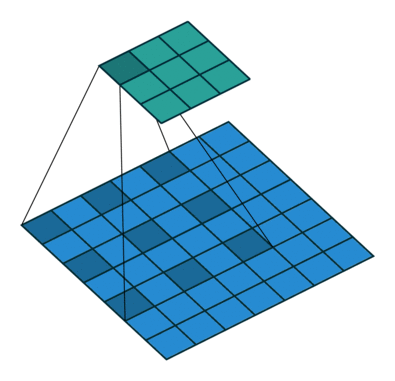

여기서 첫 번째 그림은 3x3 convolution, 아래 그림이 Atrous convolution이다.   
Atrous convolution은 '띄엄띄엄 보는 컨볼루션'이다. 일반적인 convolution과 달리 더 넗븐 영역을 보도록 해주기 위한 방법으로 커널이 일정 간격으로 떨어져 있다. 이를 통해 컨볼루션 레이어를 너무 깊게 쌓지 않아도 넓은 영역의 정보를 커버할 수 있게 된다.

##### Spatial Pyramid Pooling

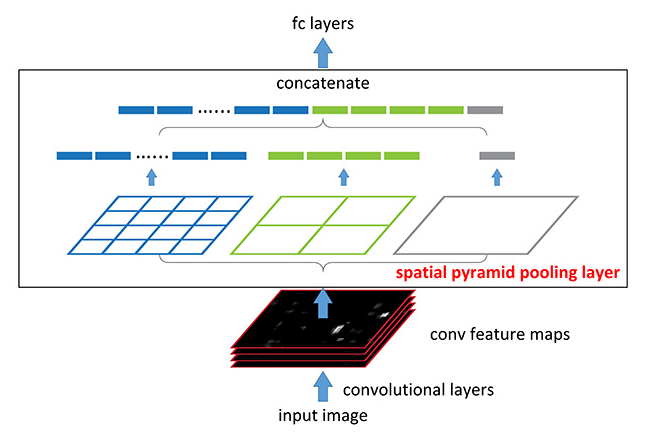

SPP는 여러 가지 scale로 convolution과 pooling을 하고 나온 다양한 특성을 연결해준다. 이를 통해 multi-scale로 특성을 추출하는 것을 병렬로 수행하는 효과를 얻을 수 있다. 여기서 convolution을 Atrous convolution으로 바꾸어 적용한 것이 Atrous Spatial Pyramid Pooling인 것이다.   
이러한 아키텍쳐는 입력 이미지의 크기와 관계없이 동일한 구조를 활용할 수 있다는 장점이 있다.

## Upsampling

Segmentation에서는 masking 단계에서 Upsampling이 중요하게 사용된다.

### 1. Nearest Neighbor

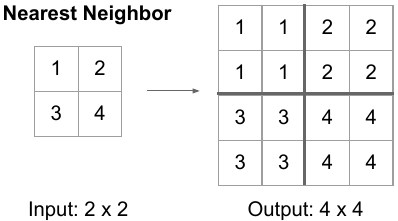

### 2. Bilinear Interpolation

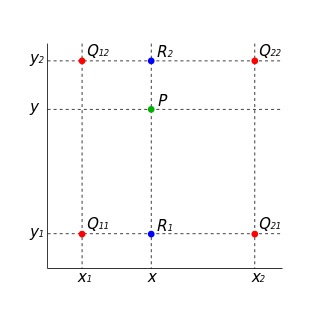

두 축에 대해서 선형보간법을 통해 필요한 값을 메우는 방식이다.

### 3. Transposed Convolution

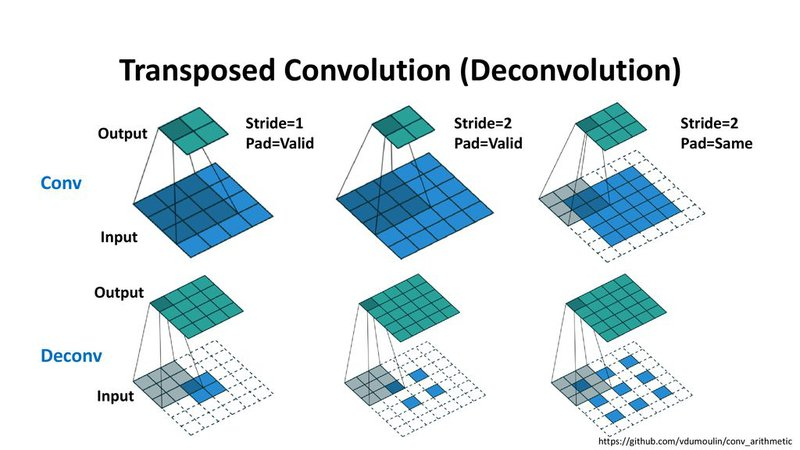

위에서는 정해진 규칙에 따라서 upsampling을 했다면 이 방법은 학습할 수 있는 파라미터를 가진 upsampling 방법이다.   
Kernel의 크기를 정의하고 입력된 Feature를 Window에 따라서 output을 계산하기보다는 이를 반대로 학습된 파라미터로 입력된 벡터를 통해 더 넓은 영역의 값을 추정해낸다.